In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine


In [27]:
google_trend_path = "../north_america_australia/usa/Arts_Entertainment/original_parallel.csv"
original_path = "../../Classification/output/regions/north_america_australia/genral_labeled_data_with_relative_traffic_rates/Entertainment/real_data/USA_with_relative_traffic_rates.csv"

google_trend_df = pd.read_csv(google_trend_path)
original_df = pd.read_csv(original_path)

In [28]:
thresholds = [0.0, 0.1, 0.25, 0.5, 0.75, 1]

data_column = google_trend_df.columns[1]

min_value = google_trend_df[data_column].min()
google_trend_df[data_column] = google_trend_df[data_column] - min_value

max_value = google_trend_df[data_column].max() #33

exampleValue = 20


def relativeValue(value, max):
    if pd.isna(value):
        return 0.1
        
    rate = int(value * 100 / max)
    if rate > 0 and rate < 50:
        return 0.1
    elif rate >= 50 and rate < 70:
        return 0.25
    elif rate >= 70 and rate < 80:
        return 0.5
    elif rate >= 80:
        return 1
    else:
        return 0.0

google_trend_df[data_column] = google_trend_df[data_column].apply(
    lambda x: relativeValue(x, max_value)
)
print(google_trend_df)

            Day  Geo: United States
0    2016-11-28                 0.1
1    2016-11-29                 0.1
2    2016-11-30                 0.1
3    2016-12-01                 0.1
4    2016-12-02                 0.1
..          ...                 ...
153  2017-04-30                 0.1
154  2017-05-01                 0.1
155  2017-05-02                 0.1
156  2017-05-03                 0.1
157  2017-05-04                 0.1

[158 rows x 2 columns]


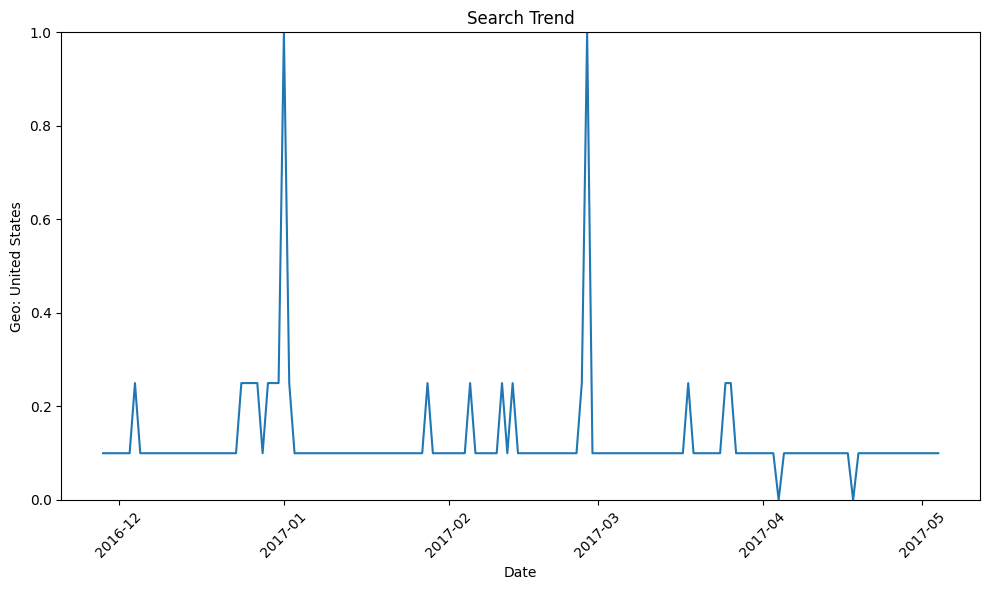

In [29]:
google_trend_df["Day"] = pd.to_datetime(google_trend_df["Day"])

data_column = google_trend_df.columns[1]

plt.figure(figsize=(10, 6))
plt.plot(google_trend_df["Day"], google_trend_df[data_column])

plt.xlabel("Date")
plt.ylabel(data_column)
plt.title("Search Trend")
plt.ylim(0, 1)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [30]:
original_df = original_df[['date', 'traffic_rate']]
original_df.head

<bound method NDFrame.head of            date  traffic_rate
0    2016-11-28           0.1
1    2016-11-29           0.1
2    2016-11-30           0.1
3    2016-12-01           0.1
4    2016-12-02           0.1
..          ...           ...
153  2017-04-30           0.1
154  2017-05-01           0.1
155  2017-05-02           0.1
156  2017-05-03           0.1
157  2017-05-04           0.1

[158 rows x 2 columns]>

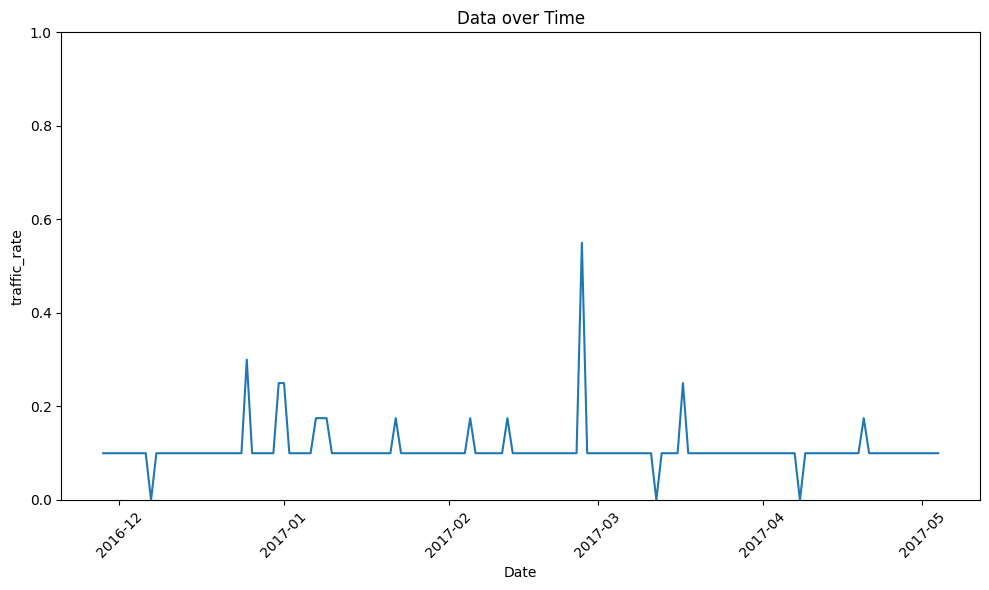

In [31]:
original_df["date"] = pd.to_datetime(original_df["date"])

data_column = original_df.columns[1]

plt.figure(figsize=(10, 6))
plt.plot(original_df["date"], original_df[data_column])

plt.xlabel("Date")
plt.ylabel(data_column)
plt.title("Data over Time")
plt.ylim(0, 1)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [32]:
def compute_similarity(df1, df2):
    common_dates = set(df1["date"]).intersection(df2["Day"])
    df1 = df1[df1["date"].isin(common_dates)]
    df2 = df2[df2["Day"].isin(common_dates)]

    data_column1 = df1.columns[1]
    data_column2 = df2.columns[1]

    df1 = df1.sort_values("date").reset_index(drop=True)
    df2 = df2.sort_values("Day").reset_index(drop=True)

    if len(df1) < 2 or len(df2) < 2:
        return None
    
    vector1 = list(df1[data_column1])
    vector2 = list(df2[data_column2])
    vector2 = [0.1 if pd.isna(x) else x for x in vector2]
    
    print("data_column1: ", data_column1)
    print("data_column2: ", data_column2)
    print("df1[data_column1]: ", vector1)
    print("df2[data_column2]: ", vector2)

    if all(not pd.isna(x) for x in vector1) and all(not pd.isna(x) for x in vector2):
        traffic_rate_similarity = 1 - cosine(vector1, vector2)
        return traffic_rate_similarity
    else:
        print("Warning: Still have NaN values after cleaning")
        return 0


In [33]:
similarity = compute_similarity(original_df, google_trend_df)
print("similarity: ", similarity)

data_column1:  traffic_rate
data_column2:  Geo: United States
df1[data_column1]:  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.25, 0.1, 0.1, 0.1, 0.1, 0.1, 0.175, 0.175, 0.175, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.175, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.175, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.175, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.55, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.25, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.175, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
df2[data_column2]:  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.